In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Problem 1: Create graphs

### Problem 1a:  A small practice graph

In [5]:
practice_graph = nx.Graph()

practice_graph.add_node("A")
practice_graph.add_node("B")
practice_graph.add_node("C")
practice_graph.add_node("D")
practice_graph.add_node("E")
practice_graph.add_node("F")

practice_graph.add_edge("A", "B")
practice_graph.add_edge("A", "C")
practice_graph.add_edge("B", "C")
practice_graph.add_edge("B", "D")
practice_graph.add_edge("C", "D")
practice_graph.add_edge("C", "F")
practice_graph.add_edge("D", "E")
practice_graph.add_edge("D", "F")

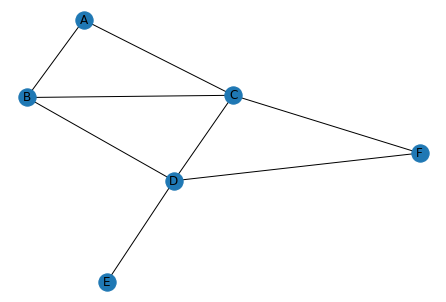

In [7]:
nx.draw(practice_graph, with_labels=True)

### Problem 1b: The Romeo and Juliet graph

In [10]:
rj = nx.Graph()

rj.add_node("Nurse")
rj.add_node("Juliet")
rj.add_node("Tybalt")
rj.add_node("Capulet")
rj.add_node("Friar Laurence")
rj.add_node("Romeo")
rj.add_node("Benvolio")
rj.add_node("Montague")
rj.add_node("Mercutio")
rj.add_node("Escalus")
rj.add_node("Paris")

rj.add_edge("Juliet", "Nurse")
rj.add_edge("Juliet", "Tybalt")
rj.add_edge("Juliet", "Friar Laurence")
rj.add_edge("Juliet", "Romeo")
rj.add_edge("Juliet", "Capulet")
rj.add_edge("Tybalt", "Capulet")
rj.add_edge("Capulet", "Escalus")
rj.add_edge("Capulet", "Paris")
rj.add_edge("Friar Laurence", "Romeo")
rj.add_edge("Romeo", "Benvolio")
rj.add_edge("Romeo", "Montague")
rj.add_edge("Romeo", "Mercutio")
rj.add_edge("Benvolio", "Montague")
rj.add_edge("Montague", "Escalus")
rj.add_edge("Escalus", "Mercutio")
rj.add_edge("Escalus", "Paris")
rj.add_edge("Mercutio", "Paris")

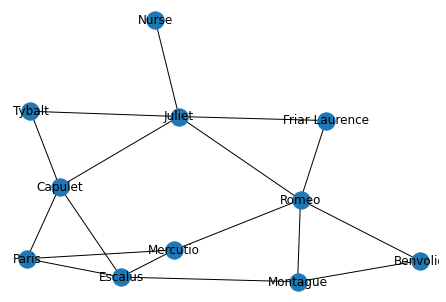

In [11]:
nx.draw(rj, with_labels=True)

## Problem 2: Recommend by number of common friends

Write the following 5 functions, whose documentation strings appear in the template file social_network.py that you were provided.

- friends_of_friends
    - a good solution is 4 lines long
- common_friends
    - a good solution to common_friends is 1 line long
- number_of_common_friends_map
- number_map_to_sorted_list
    - You may want to use the key argument to the sort routine. Furthermore, you may find the operator.itemgetter routine useful as the key argument. For details, see the Python Sorting HowTo
    - There are multiple ways to sort primarily on criterion c1, and to sort on criterion c2 wherever c1 does not make a distinction. One way is to first sort with respect to c2, then sort with respect to c1. This works because when Python sorts, it retains the ordering of any items whose sort keys are equal. (Another way is to use, as the sort key, a tuple/list of all the sort criteria. A way to do this is with a key expression like itemgetter(1, 0). This works because Python, when comparing a tuple/list, does so lexicographically (element-by-element, stopping when there is any difference.) For details, see the Python Sorting HowTo
- recommend_by_number_of_common_friends

In [23]:
def friends(graph, user):
    """Returns a set of the friends of the given user, in the given graph.
    The parameter 'user' is the string name of a person in the graph.
    """
    return set(graph.neighbors(user))

In [17]:
set(rj.neighbors("Juliet")).union(set(rj.neighbors("Romeo")))

{'Benvolio',
 'Capulet',
 'Friar Laurence',
 'Juliet',
 'Mercutio',
 'Montague',
 'Nurse',
 'Romeo',
 'Tybalt'}

In [25]:
nn = set(friends(rj, "Juliet"))
nn

{'Capulet', 'Friar Laurence', 'Nurse', 'Romeo', 'Tybalt'}

In [35]:
full_nn = set()
for neighbor in nn:
#     print(neighbor, '\n', friends(rj, neighbor))
    full_nn = full_nn.union(friends(rj, neighbor))
full_nn

{'Benvolio',
 'Capulet',
 'Escalus',
 'Friar Laurence',
 'Juliet',
 'Mercutio',
 'Montague',
 'Paris',
 'Romeo',
 'Tybalt'}

In [28]:
full_nn

set()

In [42]:
set("Juliet", )

{'J', 'e', 'i', 'l', 't', 'u'}

In [43]:
{"Juliet"}

{'Juliet'}

In [51]:
def friends_of_friends(graph, user):
    """Returns a set of friends of friends of the given user, in the given graph.
    The result does not include the given user nor any of that user's friends.
    """
    full_friend_set = set()
    nearest_neighbors = set(friends(graph, user))
    for neighbor in nearest_neighbors:
        full_friend_set = full_friend_set.union(friends(graph, neighbor))
    friends_of_friends = full_friend_set - nearest_neighbors.union({user})
    return friends_of_friends
        
assert friends_of_friends(rj, "Mercutio") == set(['Benvolio', 'Capulet', 'Friar Laurence', 'Juliet', 'Montague'])

In [55]:
def common_friends(graph, user1, user2):
    """Returns the set of friends that user1 and user2 have in common."""
    return friends(graph, user1).intersection(friends(graph, user2))

assert common_friends(practice_graph,"A", "B") == set(['C'])
assert common_friends(practice_graph,"A", "D") == set(['B', 'C'])
assert common_friends(practice_graph,"A", "E") == set([])
assert common_friends(practice_graph,"A", "F") == set(['C'])

assert common_friends(rj, "Mercutio", "Nurse") == set()
assert common_friends(rj, "Mercutio", "Romeo") == set()
assert common_friends(rj, "Mercutio", "Juliet") == set(["Romeo"])
assert common_friends(rj, "Mercutio", "Capulet") == set(["Escalus", "Paris"])

In [67]:
def number_of_common_friends_map(graph, user):
    """Returns a map from each user U to the number of friends U has in common with the given user.
    The map keys are the users who have at least one friend in common with the
    given user, and are neither the given user nor one of the given user's friends.
    Take a graph G for example:
        - A and B have two friends in common
        - A and C have one friend in common
        - A and D have one friend in common
        - A and E have no friends in common
        - A is friends with D
    number_of_common_friends_map(G, "A")  =>   { 'B':2, 'C':1 }
    """
    map_dict = {}
    for nn in friends_of_friends(graph, user):
        map_dict[nn] = len(common_friends(graph, user, nn))
    return map_dict

assert number_of_common_friends_map(practice_graph, "A") == {'D': 2, 'F': 1}

assert number_of_common_friends_map(rj, "Mercutio") == { 'Benvolio': 1, 'Capulet': 2, 'Friar Laurence': 1, 'Juliet': 1, 'Montague': 2 }

In [68]:
test_sort = number_of_common_friends_map(rj, "Mercutio")
test_sort

{'Benvolio': 1, 'Friar Laurence': 1, 'Juliet': 1, 'Montague': 2, 'Capulet': 2}

In [70]:
sorted(test_sort.items())

[('Benvolio', 1),
 ('Capulet', 2),
 ('Friar Laurence', 1),
 ('Juliet', 1),
 ('Montague', 2)]

In [85]:
[x[0] for x in sorted(sorted(test_sort.items()), key=lambda person: person[1], reverse=True)]

['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']

In [90]:
def number_map_to_sorted_list(graph_map):
    """Given a map whose values are numbers, return a list of the keys.
    The keys are sorted by the number they map to, from greatest to least.
    When two keys map to the same number, the keys are sorted by their
    natural sort order, from least to greatest."""
    return [x[0] for x in sorted(sorted(graph_map.items()), key=lambda node: node[1], reverse=True)]

assert number_map_to_sorted_list({"a":5, "b":2, "c":7, "d":5, "e":5}) == ['c', 'a', 'd', 'e', 'b']
print(number_map_to_sorted_list({"a":5, "b":2, "c":7, "d":5, "e":5}))

['c', 'a', 'd', 'e', 'b']


In [94]:
def recommend_by_number_of_common_friends(graph, user):
    """Return a list of friend recommendations for the given user.
    The friend recommendation list consists of names of people in the graph
    who are not yet a friend of the given user.
    The order of the list is determined by the number of common friends.
    """
    graph_map = number_of_common_friends_map(graph, user)
    recommendation = number_map_to_sorted_list(graph_map)
    return recommendation


assert recommend_by_number_of_common_friends(practice_graph,"A") == ['D', 'F']
print(recommend_by_number_of_common_friends(practice_graph,"A"))

assert recommend_by_number_of_common_friends(rj, "Mercutio") == ['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']
print(recommend_by_number_of_common_friends(rj, "Mercutio"))

['D', 'F']
['Capulet', 'Montague', 'Benvolio', 'Friar Laurence', 'Juliet']


## Problem 3: Recommend by influence
